# Graded Challenge 1

# Introduction

Name    : Arnaz Tejakusuma

Batch   : 012


# Data description

Dataset yang digunakan untuk project ini adalah record perjalanan penumpang yang menggunakan jasa taksi online Uber dan Lyft di Kota Boston, Amerika Serikat. Record perjalanan tersebut memuat semua detail yang bersifat umum seperti jam pemesanan, tanggal pemesanan, harga, jarak, dan tujuan. Detail-detal yang lebih bersifat khusus seperti keadaan cuaca saat pemesanan, temperatur, dan titik koordinat juga tersedia dalam dataset ini. Dataset ini diposting oleh seseorang berinisial BM dan diperoleh melalui Kaggle, dengan link sebagai berikut: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma.

# Objectives

Project ini merupakan Graded Challenge 1 di Fase 1 Program FTDS yang bertujuan untuk mengevaluasi pemahaman mengenai:

- Konsep regression dengan Linear Regression.

- Proses preprocessing data untuk digunakan dalam model Linear Regression.

- Penerapan Linear Regression untuk membuat prediksi, dalam kasus ini memprediksi 'price' dari Uber dan Lyft.

# Import libraries

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Data loading

In [526]:
# Loading dataset
df_ori = pd.read_csv('rideshare_kaggle.csv')

In [527]:
# Membuat dataset duplikat untuk proses pengolahan data, agar dataset asli tetap terjaga dan dapat dicek sewaktu-waktu
df_copy = df_ori.copy()

# Memeriksa dataset

In [528]:
# Mengganti display setting dari dataset agar tidak ada kolom yang terpotong
pd.set_option('display.max.columns', None)

In [529]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris awal dari dataset
df_copy.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [530]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris akhir dari dataset
df_copy.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [531]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris secara acak dari dataset
df_copy.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
654529,8dc5d5e0-1988-4239-9e53-fa558d7b7966,1.545060e+09,15,17,12,2018-12-17 15:20:11,America/New_York,North End,North Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.03,1.0,42.3519,-71.0551,36.87,31.64,Overcast,Light rain in the morning.,0.0005,0.07,0.87,6.56,8.60,1545022800,9.588,41.44,1545076800,23.93,1545138000,35.95,1545076800,11.82,1545134400,cloudy,33.45,1003.27,330,1.00,1,9.588,326.4,1545048555,1545081260,0.33,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
580971,4191a250-e75c-4648-adeb-ec771de41dce,1.543771e+09,17,2,12,2018-12-02 17:13:01,America/New_York,South Station,Beacon Hill,Lyft,lyft_lux,Lux Black,42.5,2.53,2.0,42.3503,-71.0810,46.78,43.89,Light Rain,Light rain until evening.,0.0342,1.00,0.96,5.89,8.48,1543755600,2.030,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,rain,45.59,1008.80,120,1.00,1,2.030,280.3,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
158976,d1109915-2af7-4a92-aa0d-d26e3819bb08,1.543741e+09,9,2,12,2018-12-02 09:02:59,America/New_York,Theatre District,Northeastern University,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,19.5,2.15,1.0,42.3661,-71.0631,38.54,36.11,Light Rain,Light rain until evening.,0.0308,1.00,0.93,3.53,3.98,1543755600,4.421,50.94,1543788000,44.88,1543816800,50.27,1543788000,45.53,1543816800,rain,36.81,1019.41,124,1.00,0,4.421,271.2,1543751796,1543785235,0.86,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
162277,e7e54940-2f27-4497-a023-905db9e39b8a,1.543436e+09,20,28,11,2018-11-28 20:08:08,America/New_York,North Station,Northeastern University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,30.5,3.30,1.0,42.3644,-71.0661,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,8.42,13.00,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.05,992.85,295,1.00,0,10.000,355.0,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
318754,28d6828b-4207-466a-8b58-a31dcaf9d55a,1.543414e+09,14,28,11,2018-11-28 14:14:08,America/New_York,Financial District,Fenway,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,22.0,4.48,1.0,42.3661,-71.0631,39.02,34.01,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.65,6.91,9.33,1543431600,9.908,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-day,28.08,991.71,290,0.37,1,9.908,350.4,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800


# Memastikan jumlah baris, kolom, tipe data, dan memeriksa entry dengan value null

In [532]:
# Memastikan total jumlah baris dan kolom dari dataset
df_copy.shape

(693071, 57)

Dataset ini terdiri dari:
- 693071 baris

- 57 kolom

In [533]:
# Memeriksa tipe data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Secara singkat singkat dapat kita lihat bahwa:

- Terdapat 29 kolom dengan tipe float

- Terdapat 17 kolom dengan tipe integer

- Terdapat 11 kolom dengan tipe object

- Terdapat entry dengan value null di kolom price

In [534]:
# Memastikan kolom yang memiliki entry null
df_copy.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Disini dapat dikonfirmasi bahwa terdapat 55095 entry dengan value null pada kolom price. Pada proses data cleaning, entry dengan value null ini akan diteliti lebih lanjut untuk kemudian ditentukan cara yang tepat untuk menangani value null tersebut. Value null dapat di-drop atau diganti valuenya dengan median atau mean. 

In [535]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Berdasarkan observasi singkat, entry didalam tabel terlihat memiliki value yang wajar, tidak ada entry yang valuenya terlihat jelas sebagai anomali.

# Exploratory Data Analysis (EDA)

# Memilih target dan feature

In [536]:
df_copy.keys()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Untuk dapat memprediksi 'price', kita memerlukan beberapa kolom untuk dijadikan feature. Namun syaratnya, kolom yang dijadikan feature tersebut harus memiliki korelasi dengan 'price'

Dataset ini terdiri dari 57 kolom, namun tidak semua kolom ini dapat memengaruhi 'price' untuk itu kita harus menentukan terlebih dahulu feature untuk project ini, sehingga proses pengolahan data dan penyusunan model menjadi lebih mudah dan lancar. 

Untuk project kali ini, targetnya adalah 'price' sedangkan berdasarkan personal judgement, feature yang saya pilih adalah 'cab_type', 'name', 'distance', dan 'surge_multiplier' 

<AxesSubplot:>

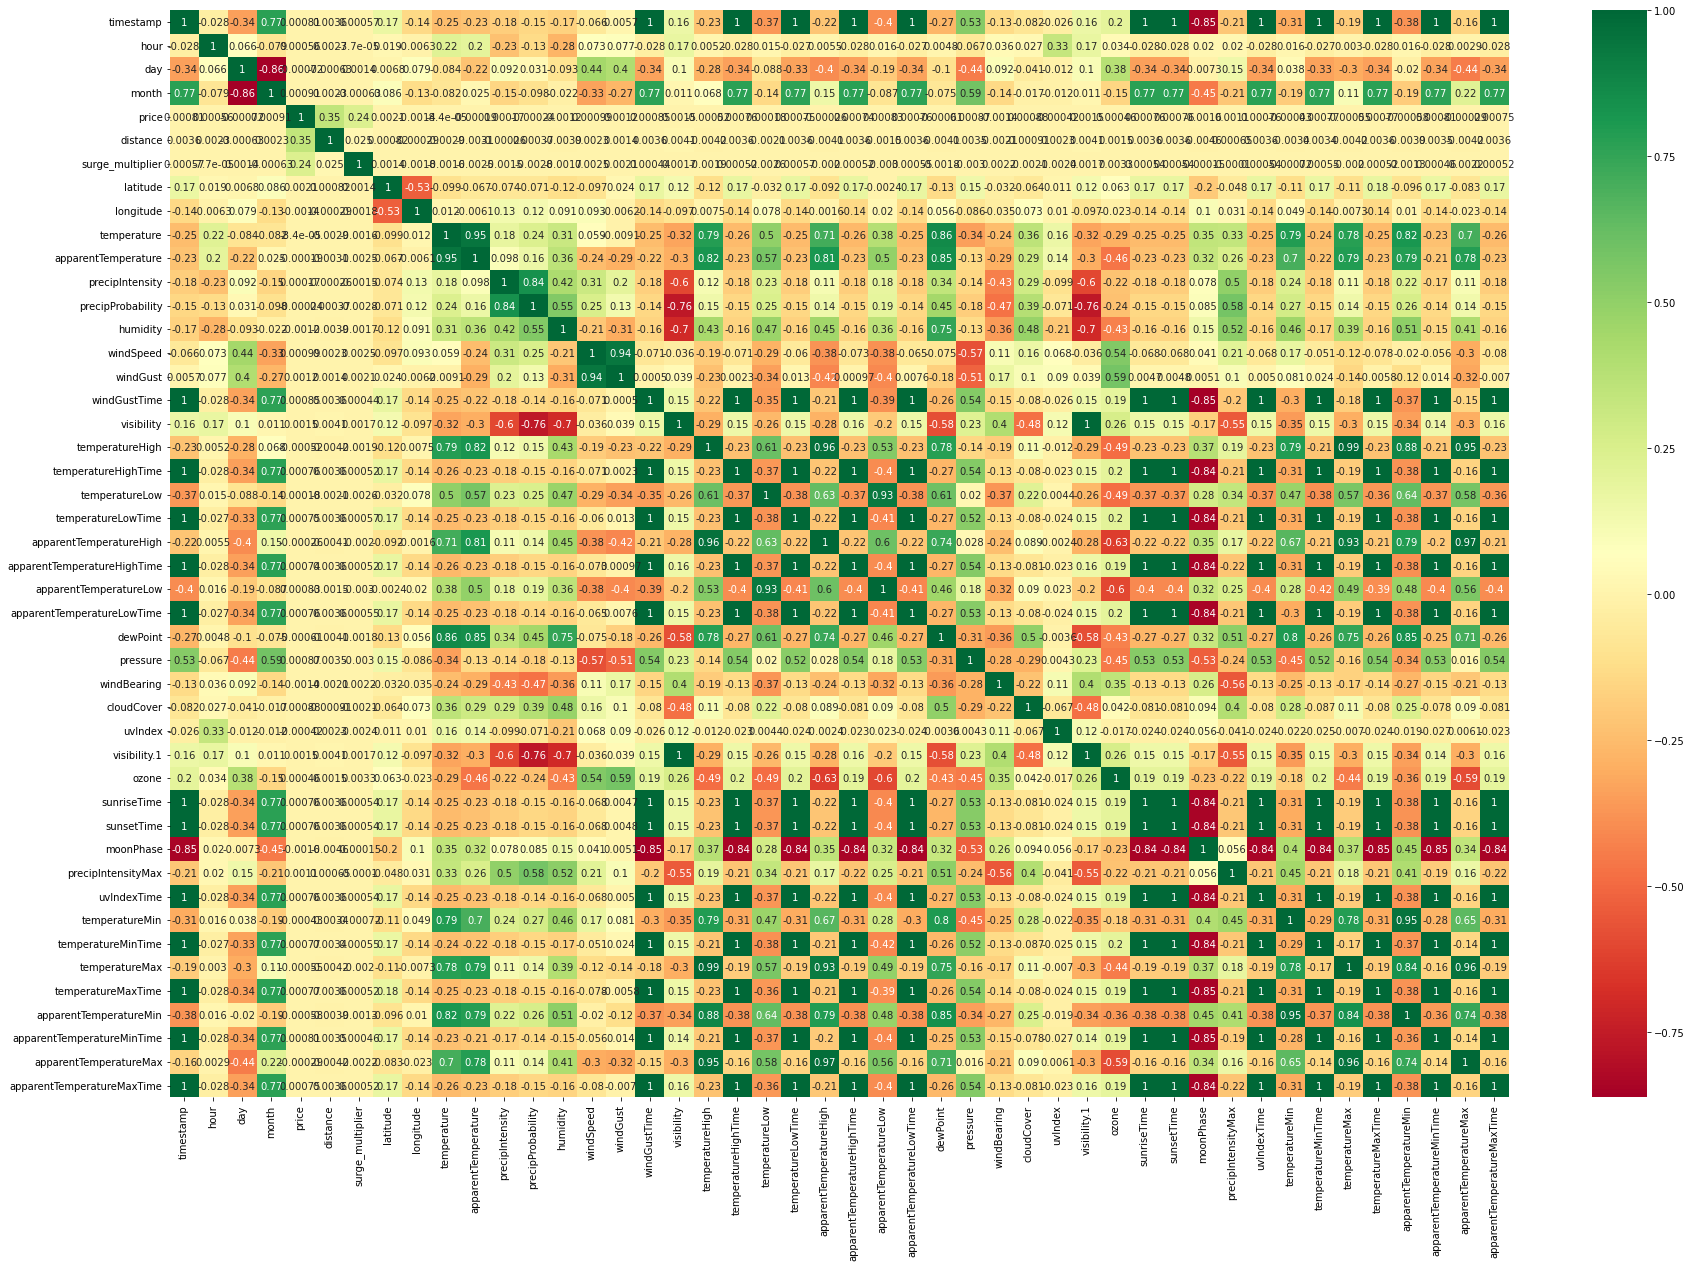

In [537]:
# Cek korelasi antara target dengan feature

plt.figure(figsize=(30,20))
sns.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn')

Heat map hanya dapat digunakan untuk melihat korelasi yang kategorinya bersifat numerikal. Nilai dari heat map yang dapat muncul antara -1 sampai dengan 1. Bila nilainya mendekati -1 artinya ada korelasi negatif. Sedangkan bila mendekati 1 artinya ada korelasi positif.

Dari heat map ini, kita dapat melihat bahwa price berkorelasi positif dengan 'distance' (0.35) dan 'surge_multiplier' (0.24). Sehingga kedua feature ini dapat kita gunakan untuk memprediksi 'price'

Sedangkan kolom 'cab_type' dan 'name' tidak muncul dalam heat map karena bukan merupakan kategori numerikal. Meskipun demikian, saya akan mempertahankan kedua feature ini karena saya meyakini bahwa 'cab_type' dan 'name' dapat memengaruhi 'price'

Uber dan Lyft memang tidak beroperasi di Indonesia, namun layaknya Grab dan Gojek, pasti akan ada perbedaan harga servis antara Uber dan Lyft. Selain itu, pastinya akan ada perbedaan harga tergantung dari tipe servis yang kita pilih.


# Mengeksplorasi kolom yang dipilih menjadi target dan feature

# Price

Skewness: 1.0457470560899256
Mean: 16.545125490614065
Median: 13.5


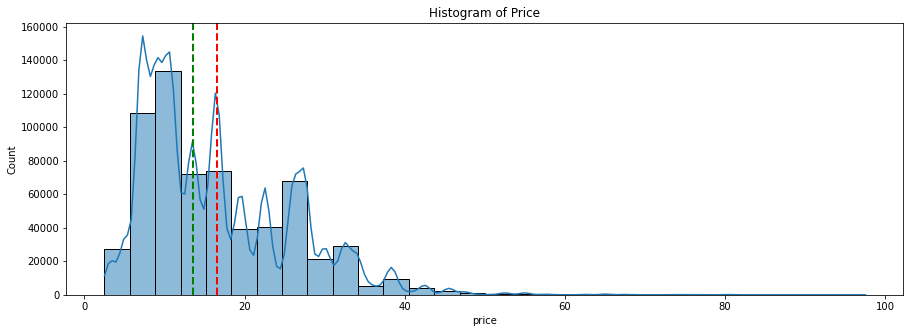

In [538]:
plt.figure(figsize=(15,5))
sns.histplot(df_copy['price'], bins= 30, kde= True)
plt.title('Histogram of Price')
plt.axvline(df_copy.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_copy.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')

print('Skewness:', df_copy.price.skew())
print('Mean:', df_copy.price.mean())
print('Median:', df_copy.price.median())

Berdasarkan penghitungan skewness, kolom 'price' memiliki nilai skewness lebih dari 1, sehingga dapat kita kategorikan sebagai moderately skewed. Sedangkan bentuk distribusinya adalah right-skewed.

Text(0.5, 1.0, 'Outliers')

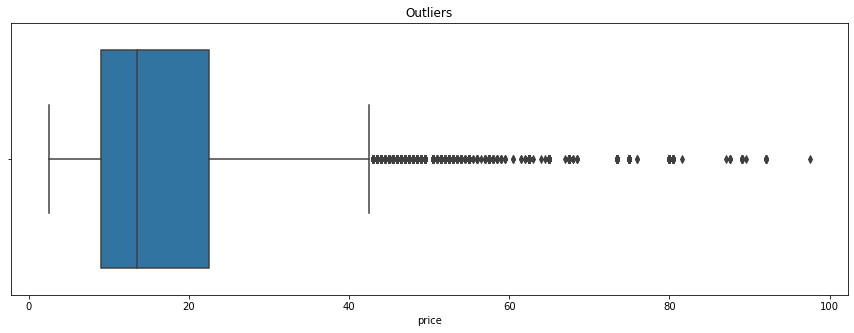

In [539]:
plt.figure(figsize=(15,5))
sns.boxplot(x='price', data=df_copy)
plt.title('Outliers')

Darisini juga terdeteksi bahwa kolom ini memiliki outliers. Nantinya outliers akan dieksplorasi lebih lanjut untuk kemudian diputuskan akan didrop atau tidak.

Text(0.5, 1.0, 'Price Against Distance')

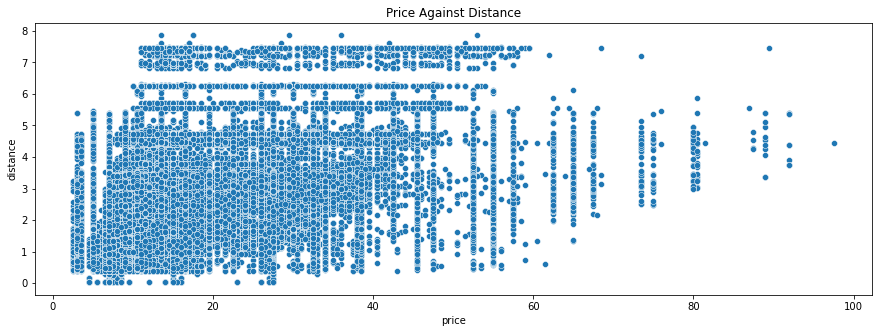

In [540]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='price', y='distance', data=df_copy)
plt.title('Price Against Distance')

Dari scatter plot ini kita dapat melihat bahwa 'price' berkorelasi dengan 'distance'

Semakin jauh 'distance' yang ditempuh, maka 'price' akan semakin tinggi.

# Surge Multiplier

In [541]:
df_copy.groupby(['cab_type', 'surge_multiplier']).size()

cab_type  surge_multiplier
Lyft      1.00                286433
          1.25                 11085
          1.50                  5065
          1.75                  2420
          2.00                  2239
          2.50                   154
          3.00                    12
Uber      1.00                385663
dtype: int64

'surge_multiplier' akan meningkat bila demand jauh lebih tinggi daripada ketersediaan driver. semakin tinggi 'surge_multiplier' maka akan semakin tinggi pula 'price'

Untuk kolom 'surge_multiplier' ditemukan perbedaan antara Uber dan Lyft. Disini terlihat Uber hanya memiliki satu kelipatan 'surge_multiplier' sedangkan Lyft memiliki beberapa tipe kelipatan 'surge_multiplier' 

# Type and Name

Text(0.5, 0, 'Cab Type')

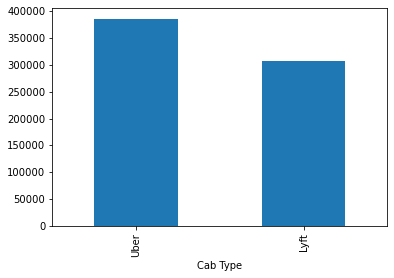

In [542]:
df_copy['cab_type'].value_counts().plot(kind='bar')
plt.xlabel('Cab Type')

Secara umum, pengguna Uber lebih banyak daripada pengguna Lyft. Hal ini kemungkinan disebabkan karena 'price' dari Uber lebih murah daripada Lyft.

Text(0.5, 1.0, 'Cab Type by Product Name')

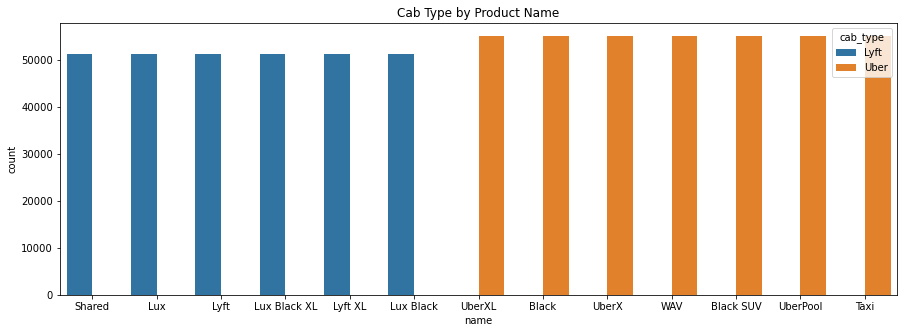

In [543]:
plt.figure(figsize=(15,5))
sns.countplot(x='name', data=df_copy, hue='cab_type')
plt.title('Cab Type by Product Name')

- Lyft memiliki 6 tipe servis: Shared, Lux, Lyft, Lux Black XL, Lyft XL, dan Lux Black.

- Uber memiliki 7 tipe servis: Uber XL, Black, UberX, WAV, Black SUV, UberPool, dan Taxi.

Text(0.5, 1.0, 'Price: Uber vs Lyft')

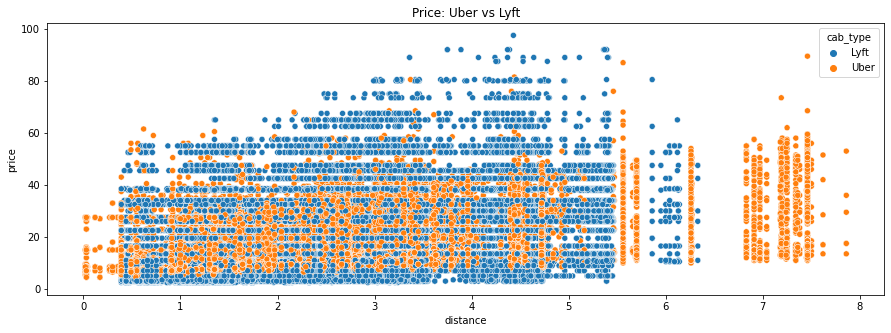

In [544]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='distance', y='price', data=df_copy, hue='cab_type')
plt.title('Price: Uber vs Lyft')

Dari scatter plot disini, terlihat bahwa secara umum 'price' dari Uber lebih murah daripada Lyft. Sehingga mungkin berimbas pada jumlah penumpang, dimana jumlah penumpang Uber menungguli jumlah penumpang Lyft.

# Distance

Skewness: 0.8343950077972692
Mean: 2.189429755393147
Median: 2.16


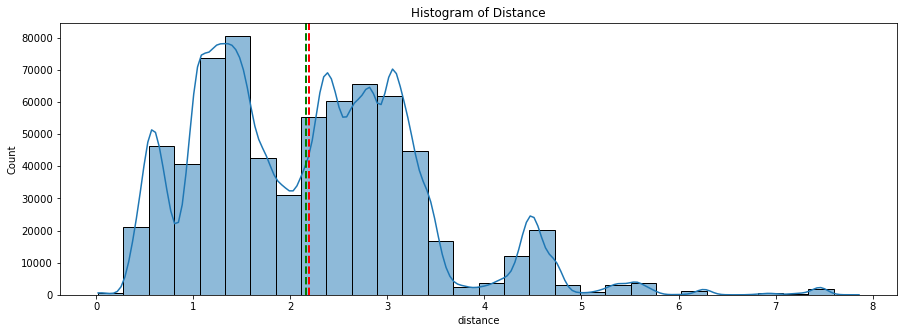

In [545]:
plt.figure(figsize=(15,5))
sns.histplot(df_copy['distance'], bins= 30, kde= True)
plt.title('Histogram of Distance')
plt.axvline(df_copy.distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_copy.distance.median(), color='green', linestyle='dashed', linewidth=2, label='Median')

print('Skewness:', df_copy.distance.skew())
print('Mean:', df_copy.distance.mean())
print('Median:', df_copy.distance.median())

Berdasarkan penghitungan skewness, kolom 'distance' memiliki nilai skewness sekitar 0.83, sehingga dapat kita kategorikan sebagai moderately skewed. Sedangkan bentuk distribusinya adalah right-skewed.

# Splitting dataset (train-set, test-set, dan inference-set) 

# Data inference

10 entry akan diambil untuk diuji menggunakan model yang dibuat untuk memprediksi 'price'

In [546]:
# Mengambil 10 entry untuk data inference
df_inf = df_copy.sample(10, random_state=17)

# Mendrop data inference dari dataset
df_train_test = df_copy.drop(df_inf.index)

# Reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Split data menjadi training set dan test set

- 80% data dikategorikan menjadi training set

- 20% data dikategorikan menjadi test set

In [547]:
df_train, df_test = train_test_split(df_train_test, test_size=0.2, random_state=17)

# Drop missing value training set

Saya memutuskan untuk mendrop missing value karena jumlahnya tidak signifikan bila dibandingkan dengan total jumlah data yang masih bisa digunakan. Selain itu bila kita mengganti missing value dengan mean atau median, dikhawatirkan akan membuat prediksi 'price' menjadi meleset.

In [548]:
df_train.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          43922
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [549]:
df_train_clean = df_train.dropna()

# Drop missing value test set

Saya memutuskan untuk mendrop missing value karena jumlahnya tidak signifikan bila dibandingkan dengan total jumlah data yang masih bisa digunakan. Selain itu bila kita mengganti missing value dengan mean atau median, dikhawatirkan akan membuat prediksi 'price' menjadi meleset.

In [550]:
df_test.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11172
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [551]:
df_test_clean = df_test.dropna()

# Outlier handling train set

Pada saat eksplorasi dataset, ditemukan bahwa ada outliers. Setelah diteliti lebih lanjut, jumlah outliers tidak signifikan karena hanya berjumlah sekitar 0.87% sehingga saya putuskan bahwa outliers akan didrop, karena tidak akan berpengaruh terhadap penghitungan prediksi 'price'

Skewness: 1.0489029290655314
Mean: 16.54280389245601
Median: 13.5


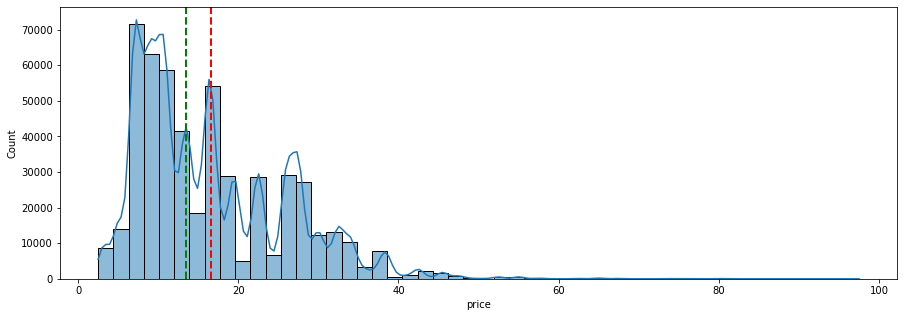

In [552]:
plt.figure(figsize=(15, 5))
sns.histplot(x='price', data=df_train_clean, bins=50, kde=True)
plt.axvline(df_train_clean.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train_clean.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')

print('Skewness:', df_train_clean.price.skew())
print('Mean:', df_train_clean.price.mean())
print('Median:', df_train_clean.price.median())


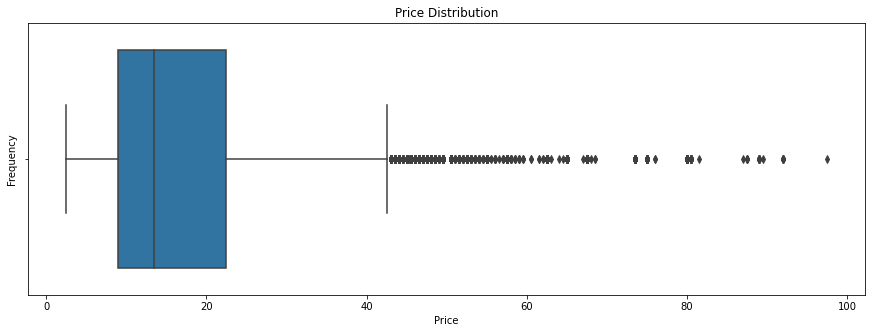

In [553]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='price', data=df_train_clean)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [554]:
quantiles_train = df_train_clean['price'].quantile([0.25, 0.5, 0.75])
quantiles_train

0.25     9.0
0.50    13.5
0.75    22.5
Name: price, dtype: float64

In [555]:
IQR_train = 22.5 - 9.0
IQR_train

13.5

In [556]:
upper_boundary_train = 22.5 + (IQR_train * 1.5)
lower_boundary_train = 9.0 - (IQR_train * 1.5)

print(upper_boundary_train)
print(lower_boundary_train)

42.75
-11.25


In [557]:
outliers_train = df_train_clean[(df_train_clean['price'] < lower_boundary_train) | (df_train_clean['price'] > upper_boundary_train)]

print('percentage:', (outliers_train.price.count() / df_train_clean.price.count())*100, '%')

percentage: 0.8779180688153002 %


In [558]:
df_train_final = df_train_clean.copy()

In [559]:
for i in outliers_train.index:
    df_train_final.drop(index = i, inplace = True)

In [560]:
df_train_final.shape

(506044, 57)

# Splitting X_train, y_train, X_test, y_test berdasarkan target dan feature

In [561]:
# Feature = name, distance, surge_multiplier
# Target = price
X_train = df_train_final[['cab_type', 'name', 'distance', 'surge_multiplier']]
y_train = df_train_final.price

X_test = df_test_clean[['cab_type', 'name', 'distance', 'surge_multiplier']]
y_test = df_test_clean.price

In [562]:
# Memisahkan kolom berdasarkan tipe
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['distance', 'surge_multiplier']
Categorical columns: ['cab_type', 'name']


In [563]:
# Memisahkan train set dan test set berdasarkan tipe kolom
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

# Scaling

Kolom yang masuk kategori numerikal adalah 'distance' dan 'surge_multiplier' karena kedua kolom tersebut memiliki value yang berbeda, maka harus dilakukan normalisasi.

Normalisasi saya lakukan dengan MinMaxScaler karena dataset yang digunakan bersifat skewed.

In [564]:
scaler = MinMaxScaler()

In [565]:
# Fit hanya untuk train set
scaler.fit(X_train_num)

# Transform both train set and test set
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Encoding

Sama halnya dengan kolom pada kategori numerikal, kolom kategorikal juga harus melewati proses normalisasi. Untuk project ini saya gunakan OrdinalEncoder karena kita sudah mengetahui bahwa ada perbedaan 'price' antara Uber dan Lyft. Begitu juga ada perbedaan harga antara tipe servis atau 'name' sehingga meskipun kolom ini bersifat kategorikal, tapi value pada kolom ini memiliki urutan.

In [566]:
encoder = OrdinalEncoder()

In [567]:
encoder = OrdinalEncoder(categories=[['Uber', 'Lyft'],['UberPool','Taxi','WAV','UberX','UberXL','Black','Black SUV','Shared','Lyft','Lyft XL','Lux','Lux Black','Lux Black XL']])

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[ 1.,  8.],
       [ 1., 12.],
       [ 0.,  4.],
       ...,
       [ 1.,  9.],
       [ 1.,  7.],
       [ 0.,  0.]])

# Concat Columns

Setelah dilakukan normalisasi pada kedua kategori, maka kita satukan lagi menjadi satu dataset untuk pengolahan lebih lanjut.

In [568]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis =1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis =1)
X_train_final

array([[ 0.38137755,  0.        ,  1.        ,  8.        ],
       [ 0.33545918,  0.        ,  1.        , 12.        ],
       [ 0.40561224,  0.        ,  0.        ,  4.        ],
       ...,
       [ 0.12882653,  0.        ,  1.        ,  9.        ],
       [ 0.2130102 ,  0.        ,  1.        ,  7.        ],
       [ 0.24872449,  0.        ,  0.        ,  0.        ]])

In [569]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_cols+cat_cols])
X_train_final_df

,distance,surge_multiplier,cab_type,name
0,0.381378,0.0,1.0,8.0
1,0.335459,0.0,1.0,12.0
2,0.405612,0.0,0.0,4.0
3,0.128827,0.0,0.0,6.0
4,0.364796,0.0,0.0,4.0
...,...,...,...,...
506039,0.385204,0.0,0.0,0.0
506040,0.948980,0.0,0.0,4.0
506041,0.128827,0.0,1.0,9.0
506042,0.213010,0.0,1.0,7.0


# Model Definition

- Menggunakan algoritma Linear Regression, Polynomial Features 2, Polynomial Features 3. Disini saya akan menggunakan beberapa algoritma untuk membandingkan model mana yang hasilnya paling baik.

- Metrics yang akan dipakai untuk mengevaluasi adalah MAE dan MAPE untuk melihat jumlah dan presentase errornya, sedangkan r2score untuk melihat tingkat ketepatan.

## Model Evalutation I

In [570]:
# Modelling
model_lin_reg = LinearRegression()

In [571]:
# Model Training
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [572]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_I = model_lin_reg.predict(X_train_final)
y_pred_test_I = model_lin_reg.predict(X_test_final)

In [573]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_I))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_I))

Error - Train Set: 3.0615542752365084
Error - Test Set: 3.1647914132515536


In [574]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_I))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_I))

Error - Train Set :  0.2474809354855035
Error - Test Set  :  0.24786135907444262


In [575]:
# Model Evaluation using r2score
print('Score - train set : ', r2_score(y_train, y_pred_train_I))
print('Score - test set  : ', r2_score(y_test, y_pred_test_I))

Score - train set :  0.8111520548742502
Score - test set  :  0.8074241921452001


Hasil Model Evaluation I dengan Linear Regression biasa ternyata cukup baik. 

- Berdasarkan r2score, model ini merupakan good fit karena score train set (0.81) dan test set (0.80) berimbang.

- Berdasarkan MAPE, tingkat error dari model ini masih dapat diterima karena masih pada presentase sekitar 20%.

- Berdasarkan MAE, diperkirakan selisih 'price' sekitar 3 USD.

## Model Evalutation II

In [576]:
# Modelling
model_poly_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [577]:
# Model training
model_poly_2.fit(X_train_final, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [578]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_II = model_poly_2.predict(X_train_final)
y_pred_test_II = model_poly_2.predict(X_test_final)

In [579]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_II))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_II))

Error - Train Set: 1.6655661616490136
Error - Test Set: 1.7065984217741903


In [580]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_II))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_II))

Error - Train Set :  0.13100775473722356
Error - Test Set  :  0.13126170170313872


In [581]:
# Model Evaluation using r2score
print('Score - Train Set : ', r2_score(y_train, y_pred_train_II))
print('Score - Test Set  : ', r2_score(y_test, y_pred_test_II))

Score - Train Set :  0.9359712953271178
Score - Test Set  :  0.9371010989689708


Hasil Model Evaluation II dengan Linear Regression (2nd-order polynomial) ternyata lebih baik daripada Linear Regression biasa.

- Berdasarkan r2score, model ini merupakan good fit karena score train set (0.935) dan test set (0.937) berimbang.

- Berdasarkan MAPE, tingkat error dari model ini lebih baik daripada Linear Regression biasa. Pada model ini, tingkat error turun menjadi sekitar 13%.

- Berdasarkan MAE, diperkirakan selisih 'price' sekitar 1.6 - 1.7 USD. 

## Model Evaluation III

In [582]:
# Modelling
model_poly_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [583]:
# Model training
model_poly_3.fit(X_train_final, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [584]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_III = model_poly_3.predict(X_train_final)
y_pred_test_III = model_poly_3.predict(X_test_final)

In [585]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_III))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_III))

Error - Train Set: 1.426169384928801
Error - Test Set: 1.4641599918997334


In [586]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_III))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_III))

Error - Train Set :  0.10629429769178815
Error - Test Set  :  0.10647969424386933


In [587]:
# Model Evaluation using r2score
print('Score - Train Set : ', r2_score(y_train, y_pred_train_III))
print('Score - Test Set  : ', r2_score(y_test, y_pred_test_III))

Score - Train Set :  0.9485346941473162
Score - Test Set  :  0.9485073801810225


Hasil Model Evaluation III dengan Linear Regression (3rd-order polynomial) merupakan yang paling baik.

- Berdasarkan r2score, model ini merupakan good fit karena score train set (0.948) dan test set (0.948) berimbang.

- Berdasarkan MAPE, tingkat error dari model ini lebih baik daripada Linear Regression biasa dan 2nd-order polynomial. Pada model ini, tingkat error hanya sekitar 10%. 

- Berdasarkan MAE, jika dibandingkan dengan kedua model sebelumnya, diperkirakan selisih 'price' sekitar 1.4 USD.

Karena model ini merupakan model dengan performa yang paling baik, maka saya akan menggunakan model ini untuk proses model testing.


## Model Testing

In [588]:
# menunjukan dataset inference
df_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,f41971c8-85ef-4c90-8787-580b2de75e8b,1.543421e+09,16,28,11,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.39,1.0,42.3661,-71.0631,41.16,35.84,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.61,8.33,12.76,1543431600,10.000,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-day,28.91,991.41,297,0.81,1,10.000,352.0,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
1,5e4b84a7-6080-4bcc-b0cd-83798c658a38,1.543693e+09,19,1,12,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,lyft,Lyft,9.0,2.20,1.0,42.3661,-71.0631,43.99,43.99,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.52,2.13,3.27,1543672800,9.815,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,partly-cloudy-day,27.51,1022.41,121,0.42,1,9.815,273.9,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
2,a7bc576b-9a04-4506-9378-1504256c2550,1.545138e+09,12,18,12,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.5,1.16,1.0,42.3429,-71.1003,24.61,12.13,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.50,14.95,23.96,1545127200,9.948,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,partly-cloudy-night,8.55,1007.14,314,0.78,0,9.948,371.4,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
3,d1856ce6-02c3-4dbe-b5e6-de852760f067,1.545055e+09,13,17,12,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.0,5.70,1.0,42.3519,-71.0551,35.19,28.80,Overcast,Light rain in the morning.,0.0000,0.0,0.89,7.88,8.47,1545022800,8.459,41.44,1545076800,23.93,1545138000,35.95,1545076800,11.82,1545134400,cloudy,32.17,1004.17,329,1.00,0,8.459,325.3,1545048555,1545081260,0.33,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
4,b26216d7-582f-47eb-abdb-4c4321c25740,1.543448e+09,23,28,11,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,30.5,4.55,1.0,42.2148,-71.0330,39.35,33.00,Overcast,Mostly cloudy throughout the day.,0.0000,0.0,0.69,9.63,14.39,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,cloudy,29.86,995.30,293,1.00,0,10.000,355.0,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,fafe1453-131b-4f03-9c0e-c0cffea171ef,1.544926e+09,2,16,12,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,lyft_luxsuv,Lux Black XL,27.5,0.98,1.0,42.3505,-71.1054,40.87,37.73,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,4.68,5.77,1544918400,9.827,54.29,1544896800,38.48,1544954400,53.62,1544896800,34.85,1544954400,partly-cloudy-night,32.00,1024.46,36,0.14,0,9.827,296.6,1544875688,1544908439,0.27,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,154489680

In [589]:
# Terdapat satu entry pada dataset inference memiliki value null
df_inf.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          1
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [590]:
# mendrop entry dengan value null
df_inf_clean = df_inf.dropna()

In [591]:
df_inf_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [592]:
# split numerical and categorial columns
df_inf_num = df_inf_clean[num_cols]
df_inf_cat = df_inf_clean[cat_cols]

In [593]:
df_inf_num

,distance,surge_multiplier
1,2.20,1.0
2,1.16,1.0
3,5.70,1.0
4,4.55,1.0
5,0.98,1.0
6,1.92,1.0
7,1.02,1.0
8,2.98,1.0
9,1.84,1.0


In [594]:
df_inf_cat

,cab_type,name
1,Lyft,Lyft
2,Uber,Black
3,Uber,WAV
4,Uber,Black
5,Lyft,Lux Black XL
6,Uber,UberX
7,Lyft,Lux
8,Uber,UberPool
9,Uber,Black SUV


In [595]:
# Feature scaling and encoding
df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_encoded = encoder.transform(df_inf_cat)

In [596]:
# Concat columns
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)
df_inf_final

array([[ 0.27806122,  0.        ,  1.        ,  8.        ],
       [ 0.14540816,  0.        ,  0.        ,  5.        ],
       [ 0.7244898 ,  0.        ,  0.        ,  2.        ],
       [ 0.57780612,  0.        ,  0.        ,  5.        ],
       [ 0.12244898,  0.        ,  1.        , 12.        ],
       [ 0.24234694,  0.        ,  0.        ,  3.        ],
       [ 0.12755102,  0.        ,  1.        , 10.        ],
       [ 0.37755102,  0.        ,  0.        ,  0.        ],
       [ 0.23214286,  0.        ,  0.        ,  6.        ]])

In [597]:
# Prediksi menggunakan Model III (3rd-order polynomial)
y_pred_inf = model_poly_3.predict(df_inf_final)
y_pred_inf

array([ 9.85085735, 17.35477679, 15.79036501, 28.79782777, 25.11586955,
       10.19674991, 13.58913485,  9.64837341, 28.74729843])

In [598]:
# Membentuk hasil prediksi menjadi sebuah dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df_copy = y_pred_inf_df.copy()

In [599]:
# Mereset index
y_pred_inf_df_copy.reset_index(drop=True, inplace=True)

In [600]:
# Membuat copy dari dataset inference
df_inf_clean_copy = df_inf_clean.copy()

In [601]:
# Mereset index dataset inference
df_inf_clean_copy.reset_index(drop=True, inplace=True)

In [602]:
# Menguji data inference dengan MAE, MAPE, dan R2score
print('MAE      :', mean_absolute_error(df_inf_clean_copy['price'], y_pred_inf_df_copy))

print('MAPE     : ', mean_absolute_percentage_error(df_inf_clean_copy['price'], y_pred_inf_df_copy))

print('R2score  : ', r2_score(df_inf_clean_copy['price'], y_pred_inf_df_copy))

MAE      : 1.2741235121052898
MAPE     :  0.08565969358425575
R2score  :  0.9659636316629222


Setelah Model III (3rd-order polynomial) diuji menggunakan data inference, dapat disimpulkan bahwa model bekerja dengan baik.

- Berdasarkan r2score, nilainya mencapai 0.96

- Berdasarkan MAPE, tingkat error hanya sekitar 8.5%

- Berdasarkan MAE, diperkirakan selisih 'price' sampai sekitar 1.27 USD.

# Conclusion

Dataset ini merupakan record perjalanan penumpang menggunakan jasa taksi online Uber dan Lyft di Kota Boston, Amerika Serikat. Dari eksplorasi data secara sederhana, kita ketahui bahwa Uber memiliki lebih banyak penumpang daripada Lyft.

Hal ini kemungkinan disebabkan karena Uber memiliki tarif yang lebih murah jika dibandingkan dengan Lyft. Dua hal yang membuat harga Uber lebih murah daripada Lyft adalah perbedaan harga per tipe servis dan surge multiplier. Misalnya, jika kita bandingkan tipe servis Uber dan Lyft yang sebanding, contohnya UberPool - Shared atau UberXL - Lyft XL, harga servis Uber selalu lebih murah. Selain itu, Uber juga tidak memiliki kepilatan surge multiplier yang tinggi, sedangkan Lyft memiliki beberapa kelipatan surge multiplier. Hal ini membuat harga Lyft menjadi semakin mahal bila dibandingkan dengan Uber. Perbedaan harga inilah yang mungkin membuat lebih banyak orang memilih menggunakan jasa Uber ketimbang Lyft.

Tujuan utama project ini adalah membuat model untuk memprediksi 'price' daripada Uber dan Lyft. Dalam project ini, karena tujuan utamanya adalah memprediksi 'price' maka 'price' disini ditetapkan sebagai target sedangkan yang dipilih menjadi feature adalah 'cab_type', 'name', 'surge_multiplier', dan 'distance'

Dalam project ini saya membuat 3 model yaitu Linear Regression biasa, 2nd-order polynomial, dan 3rd-order polynomial. Berdasarkan model evaluation, model 3rd-order polynomial merupakan yang terbaik. model ini merupakan good fit, memiliki score yang tinggi, dan tingkat error yang rendah. Maka dari itu, model 3rd-order polynomial ini saya gunakan untuk dites pada inference. Setelah diuji, dapat disimpulkan bahwa model bekerja dengan baik karena r2score mencapai 0.96, tingkat MAPE hanya 8.5%, dan perkiraan selisih 'price' hanya sekitar 1.27 USD.

# Jawab Pertanyaan

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

- Uji Normalitas artinya Linear Regression berasumsi bahwa sisaan berdistribusi mengetahui apakah dalam persamaan regresi tersebut residual berdistribusi normal.

- Uji Homoskedastisitas artinya Linear Regression berasumsi bahwa varian setiap sisaan masih tetap sama baik untuk nilai-nilai pada variabel independen yang kecil maupun besar.

- Uji Non-autokorelasi artinya Linear Regression berasumsi bahwa tidak ada autokorelasi antara serangkaian pengamatan yang diurutkan menurut waktu.

- Uji Non-multikolinieritas artinya Linear Regression memastikan bahwa tidak terdapat multikolinieritas (beberapa kolinieritas). Kolonieritas sendiri terjadi karena terdapat korelasi yang cukup tinggi antara variabel independen.

- Uji Linearitas artinya Linear Regression berasumsi bahwa garis regresi antara sumbu X dan Y membentuk garis linear/lurus.

Sumber: https://eprints.uny.ac.id/53201/3/BAB%20II.pdf

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

Intercept adalah nilai pada sumbu Y ketika sumbu X bernilai 0. Dalam project ini, intercept dari model regresi adalah -3.123.

Sedangkan nilai slope mempengaruhi kemiringan garis regresi. Dalam project ini, nilai slope adalah 20.5 (distance), 25.5 (surge multiplier), -23.3 (cab type), dan 3.9(name)

In [603]:
# Mencari nilai intercept dan slope
print("Model Slope:    ", model_lin_reg.coef_)
print("Model intercept:", model_lin_reg.intercept_)

Model Slope:     [ 20.57781906  25.54358336 -23.3200083    3.94648563]
Model intercept: -3.1232999355502677


In [604]:
# Melist kolom
X_train_final_df.columns

MultiIndex([(        'distance',),
            ('surge_multiplier',),
            (        'cab_type',),
            (            'name',)],
           )